# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data.Such as the camera of a self driving car recognizing the car in front

## Get the data

The images we are working with are from the Fodd 101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we have modified it to only use two classes (pizza and steak) using the image dta modification notebook

> **Note:** We start with a smaller dataset so we can expriment quickly and figure what works(or better yet what does'nt work)
before scaling up

In [1]:
import zipfile

# Unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data(become one with the data)

A very crucial step at the beginning of any machine learning project is becoming one with the data

And for the computer vision project .. this usually means visulaizing mnay samples of our data

In [2]:
import os
os.listdir("pizza_steak")

['test', 'train']

In [3]:
os.listdir("pizza_steak/train")

['pizza', 'steak']

In [4]:
os.listdir("pizza_steak/train/pizza")

['1008104.jpg',
 '1008144.jpg',
 '1008844.jpg',
 '1008941.jpg',
 '1011404.jpg',
 '102037.jpg',
 '1026922.jpg',
 '1029698.jpg',
 '1033251.jpg',
 '1035854.jpg',
 '1038357.jpg',
 '1040878.jpg',
 '1044524.jpg',
 '1044789.jpg',
 '1047561.jpg',
 '1048649.jpg',
 '1054420.jpg',
 '1055065.jpg',
 '105910.jpg',
 '1065078.jpg',
 '1069629.jpg',
 '1075568.jpg',
 '1076699.jpg',
 '1083380.jpg',
 '1084888.jpg',
 '1088332.jpg',
 '1089334.jpg',
 '1097980.jpg',
 '1098197.jpg',
 '1105700.jpg',
 '1107714.jpg',
 '111051.jpg',
 '1110966.jpg',
 '1123386.jpg',
 '1137400.jpg',
 '1138936.jpg',
 '1143057.jpg',
 '1157438.jpg',
 '1159797.jpg',
 '1165451.jpg',
 '1173913.jpg',
 '1183278.jpg',
 '1202925.jpg',
 '1205154.jpg',
 '1207213.jpg',
 '1209973.jpg',
 '121834.jpg',
 '12301.jpg',
 '1234172.jpg',
 '1243215.jpg',
 '1245628.jpg',
 '1247645.jpg',
 '1248346.jpg',
 '1248478.jpg',
 '1260554.jpg',
 '1267359.jpg',
 '1269960.jpg',
 '1270986.jpg',
 '12718.jpg',
 '1284978.jpg',
 '1285298.jpg',
 '1287004.jpg',
 '1289139.jpg',


In [5]:
# Walk through the pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

There are 2 directories and 0 images in 'pizza_steak
There are 2 directories and 0 images in 'pizza_steak\test
There are 0 directories and 250 images in 'pizza_steak\test\pizza
There are 0 directories and 250 images in 'pizza_steak\test\steak
There are 2 directories and 0 images in 'pizza_steak\train
There are 0 directories and 750 images in 'pizza_steak\train\pizza
There are 0 directories and 750 images in 'pizza_steak\train\steak


In [6]:
# Another way to find out how many images are in each directory
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

> To visualize our images,first let's get our class names programmatically

In [7]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
# Create a list of class names from sub directories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    # Set up the target directory(we'll view images form here)
    target_folder=target_dir+target_class

    # Get a random image path
    random_image=random.sample(os.listdir(target_folder),1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img=mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape:{img.shape}") # show the shape of the image

    return img

['1008941.jpg']
Image shape:(385, 512, 3)


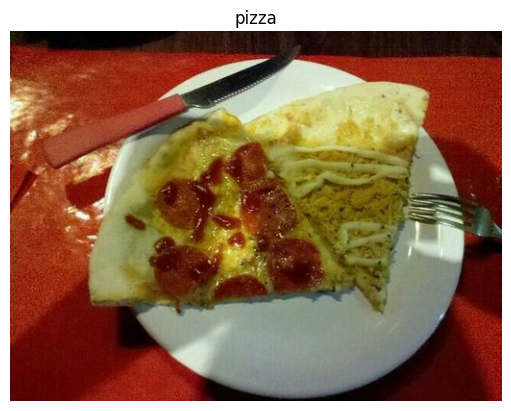

In [9]:
# View a random image from training dataset
img=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [10]:
img,img.dtype

(array([[[ 24,  25,   7],
         [ 28,  29,  11],
         [ 29,  27,  12],
         ...,
         [  7,   9,   8],
         [  9,  10,  12],
         [  9,  10,  12]],
 
        [[ 15,  16,   0],
         [ 25,  26,   8],
         [ 31,  29,  14],
         ...,
         [  8,  10,   9],
         [  9,  10,  12],
         [  9,  10,  12]],
 
        [[ 18,  19,   3],
         [ 29,  30,  14],
         [ 37,  35,  20],
         ...,
         [ 11,  11,  11],
         [ 10,  11,  13],
         [  9,  10,  12]],
 
        ...,
 
        [[ 81,   8,   0],
         [ 80,   7,   0],
         [ 80,   6,   0],
         ...,
         [127,  18,  15],
         [125,  15,  14],
         [123,  13,  12]],
 
        [[ 78,   4,   0],
         [ 78,   4,   0],
         [ 79,   5,   0],
         ...,
         [124,  15,  12],
         [122,  12,  11],
         [126,  16,  15]],
 
        [[ 88,  11,   5],
         [ 82,   5,   0],
         [ 84,   7,   1],
         ...,
         [118,   8,   7],
  

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(385, 512, 3), dtype=uint8, numpy=
array([[[ 24,  25,   7],
        [ 28,  29,  11],
        [ 29,  27,  12],
        ...,
        [  7,   9,   8],
        [  9,  10,  12],
        [  9,  10,  12]],

       [[ 15,  16,   0],
        [ 25,  26,   8],
        [ 31,  29,  14],
        ...,
        [  8,  10,   9],
        [  9,  10,  12],
        [  9,  10,  12]],

       [[ 18,  19,   3],
        [ 29,  30,  14],
        [ 37,  35,  20],
        ...,
        [ 11,  11,  11],
        [ 10,  11,  13],
        [  9,  10,  12]],

       ...,

       [[ 81,   8,   0],
        [ 80,   7,   0],
        [ 80,   6,   0],
        ...,
        [127,  18,  15],
        [125,  15,  14],
        [123,  13,  12]],

       [[ 78,   4,   0],
        [ 78,   4,   0],
        [ 79,   5,   0],
        ...,
        [124,  15,  12],
        [122,  12,  11],
        [126,  16,  15]],

       [[ 88,  11,   5],
        [ 82,   5,   0],
        [ 84,   7,   1],
        ...,
        [118,   8,   

In [12]:
# View the image shape
img.shape # returns the width,height ,color channels

(385, 512, 3)

> **Note:** As we've discussed before,many machine learning models,including neural networks prefer the values they work with to be between 0 and 1.Knowing this one of the most common preprocessing steps for working with images is to scale(also reffered to as *normalise*) their pixed values by diving the image by 255.(since 255 is the maximum pixel value).

In [13]:
# Get all the pixel values betwwen 0 and 1
img/float(255)

array([[[0.09411765, 0.09803922, 0.02745098],
        [0.10980392, 0.11372549, 0.04313725],
        [0.11372549, 0.10588235, 0.04705882],
        ...,
        [0.02745098, 0.03529412, 0.03137255],
        [0.03529412, 0.03921569, 0.04705882],
        [0.03529412, 0.03921569, 0.04705882]],

       [[0.05882353, 0.0627451 , 0.        ],
        [0.09803922, 0.10196078, 0.03137255],
        [0.12156863, 0.11372549, 0.05490196],
        ...,
        [0.03137255, 0.03921569, 0.03529412],
        [0.03529412, 0.03921569, 0.04705882],
        [0.03529412, 0.03921569, 0.04705882]],

       [[0.07058824, 0.0745098 , 0.01176471],
        [0.11372549, 0.11764706, 0.05490196],
        [0.14509804, 0.1372549 , 0.07843137],
        ...,
        [0.04313725, 0.04313725, 0.04313725],
        [0.03921569, 0.04313725, 0.05098039],
        [0.03529412, 0.03921569, 0.04705882]],

       ...,

       [[0.31764706, 0.03137255, 0.        ],
        [0.31372549, 0.02745098, 0.        ],
        [0.31372549, 0

## An end-to-end example

Let's build a convolutional neural network to find the patterns in our images,more specifically we need way to:
* Load our images
* Preprocess our images
* Build a CNN to find the patterns in our images
* Fit the CNN to our traing data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random Seed
tf.random.set_seed(42)

# Preprocess the data(get all the pixel values between 0 & 1 , also called normalization)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

# Setup paths to data directories
train_dir=r"pizza_steak\train"
test_dir=r"pizza_steak\test"

# Import data directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",# here we are using binary because we have only two classes
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

# Build a CNN model(Same as the Tiny VGG on the CNN explainer website)
model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),

    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit the model
history_1=model_1.fit(train_data,
                      epochs=5,steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 415ms/step - loss: 0.5609 - accuracy: 0.6927 - val_loss: 0.3589 - val_accuracy: 0.8520
Epoch 2/5
47/47 [==============================] - 4s 83ms/step - loss: 0.4081 - accuracy: 0.8067 - val_loss: 0.4121 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 4s 79ms/step - loss: 0.4012 - accuracy: 0.8187 - val_loss: 0.3508 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 4s 82ms/step - loss: 0.3536 - accuracy: 0.8433 - val_loss: 0.3496 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 4s 81ms/step - loss: 0.3335 - accuracy: 0.8567 - val_loss: 0.3479 - val_accuracy: 0.8500


In [15]:
# Get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

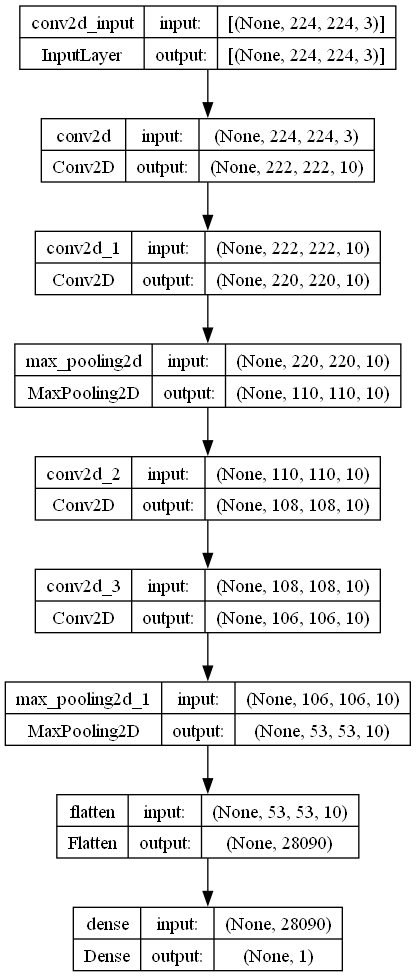

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model_1,show_shapes=True)

,loss,accuracy,val_loss,val_accuracy
0,0.631611,0.641333,0.499491,0.758
1,0.487794,0.769333,0.433288,0.802
2,0.434429,0.804667,0.344009,0.866
3,0.377375,0.842000,0.321825,0.892
4,0.372856,0.841333,0.317850,0.874


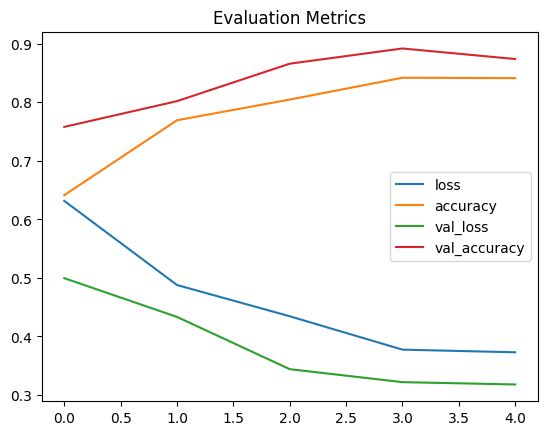

In [17]:
import pandas as pd
history_1_tab=pd.DataFrame(history_1.history)
pd.DataFrame(history_1.history).plot(title="Evaluation Metrics")
history_1_tab

## Using the same model as before

Let's replicate the model we've bulit in a previous section to see if it works our image data.

The model we're building is from [Tensorflow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.22064&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [18]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow Playground model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

# Fit the model
history_2=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 75ms/step - loss: 1.1100 - accuracy: 0.4920 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 3s 68ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 3s 69ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 3s 69ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 3s 71ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


<Axes: title={'center': 'Model_2 Eval metrics'}>

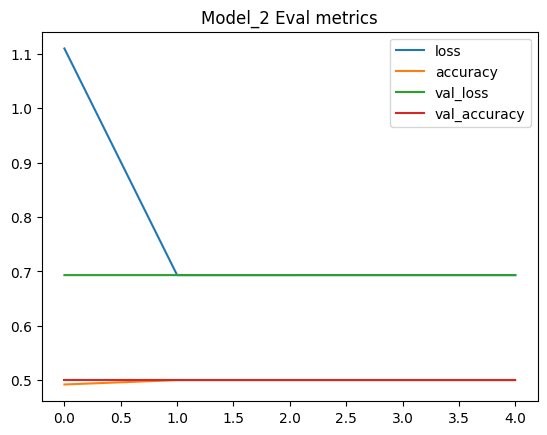

In [19]:
pd.DataFrame(history_2.history).plot(title="Model_2 Eval metrics")

In [20]:
# Check the summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


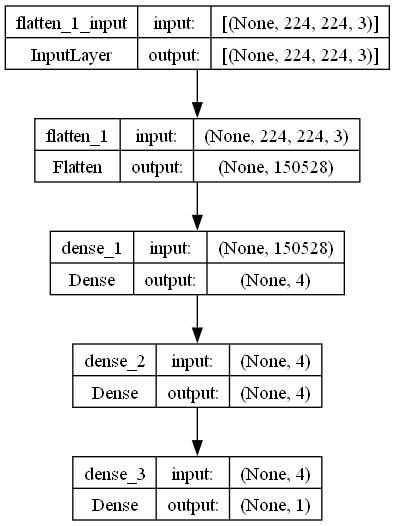

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model_2,show_shapes=True)

Despite having 20x more paramaters than our CNN model(*model_1*),model_2 performs terribly..let's try to improve it

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3=tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(224,224,3)),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
histroy_3=model_3.fit(train_data,epochs=10,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 4s 76ms/step - loss: 4.2627 - accuracy: 0.6027 - val_loss: 1.2087 - val_accuracy: 0.7320
Epoch 2/10
47/47 [==============================] - 3s 72ms/step - loss: 1.0824 - accuracy: 0.7213 - val_loss: 0.6137 - val_accuracy: 0.7340
Epoch 3/10
47/47 [==============================] - 3s 72ms/step - loss: 1.6699 - accuracy: 0.6460 - val_loss: 0.5643 - val_accuracy: 0.7780
Epoch 4/10
47/47 [==============================] - 3s 71ms/step - loss: 0.9159 - accuracy: 0.7260 - val_loss: 1.0057 - val_accuracy: 0.7460
Epoch 5/10
47/47 [==============================] - 3s 71ms/step - loss: 0.7014 - accuracy: 0.7460 - val_loss: 0.6929 - val_accuracy: 0.6880
Epoch 6/10
47/47 [==============================] - 3s 73ms/step - loss: 0.4883 - accuracy: 0.7847 - val_loss: 0.5202 - val_accuracy: 0.7320
Epoch 7/10
47/47 [==============================] - 3s 74ms/step - loss: 0.4292 - accuracy: 0.8153 - val_loss: 0.4443 - val_accuracy: 0.7960
Epoch 8/10
47

In [23]:
# Let's check the summary of our model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


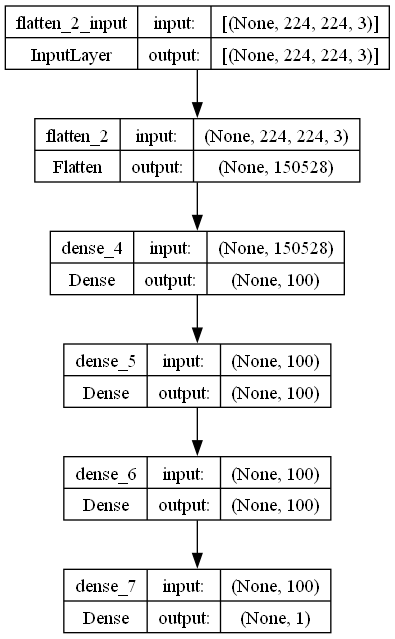

In [24]:
plot_model(model_3,show_shapes=True)

<Axes: title={'center': 'History_3 Eval metrics'}>

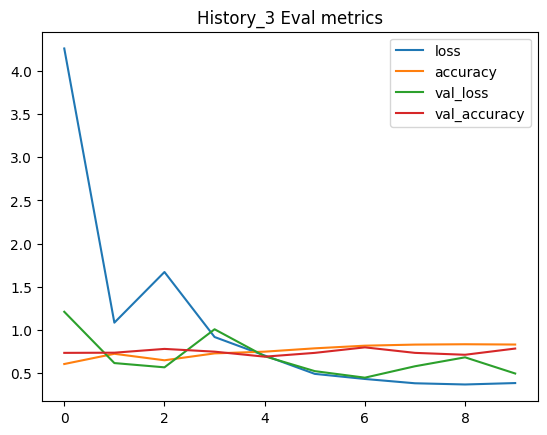

In [25]:
pd.DataFrame(histroy_3.history).plot(title="History_3 Eval metrics")

## Binary Classification:Let's break it down

1. Become one with the data(visualize,visualize,visualize)
2. Preprocess the data(prepared it for our model, the main step here was scaling/normalizing and turing our data into batches)
3. Created a model(start with a basline)
4. Fit the model
5. Evaluate the model
5. Adjust differnent parameters and improve the model(try to beat our baseline)
7. Repaet until satisfied(experiment,experiment,experiment)

### 1. Become one with the data

['468384.jpg']
Image shape:(512, 512, 3)
['3766476.jpg']
Image shape:(512, 512, 3)


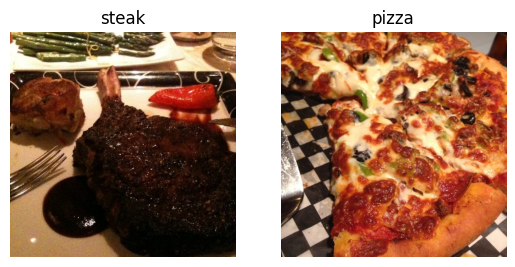

In [16]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data(prepare it for a model)

In [17]:
# Define directory dataset paths
train_dir=r"pizza_steak/train/"
test_dir=r"pizza_steak/test/"

Our next step is to turn our data into **batches**
A batch is a samll subset of data.Rather than look at all ~10,000 images at one time,a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of ypur processor(GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
Beacause 32 is good for your health 


In [18]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [19]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [20]:
 # Create train ad test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [21]:
# Load in our image data from directories and turn them inti batches
train_data=train_datagen.flow_from_directory(directory=train_dir, #taregt directory of images
                                             target_size=(224,224), # target size of images(height,width) 
                                             class_mode="binary", # type of data you're working with
                                             batch_size=32) # size of minibatches to load data into
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
# get the sample of train data batch
images,labels=train_data.next() # get the "next" batch of images/labels
len(images),len(labels)

(32, 32)

In [23]:
# How many batches are there?
len(train_data)

47

In [24]:
1500/32

46.875

In [25]:
# Get the first two images of first batch
images[:2],images[:2].shape

(array([[[[0.41960788, 0.24705884, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.3921569 , 0.21960786, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.4039216 , 0.23137257, 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38823533, 0.34901962, 0.3137255 ],
          [0.40784

In [26]:
images[7].shape

(224, 224, 3)

In [27]:
# View the first batch of labels
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a realaively simple model or exisiting result that you setup when beginnnig a machine learning experiment and then as you keep experimenting,you try to beat the baseline.

> **Note:** In deep learning, there is almost an infinite amont of architectures you could create.So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required(e.g. look at which current model is performing best in the field for your problem )

In [28]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [29]:
# Create the model(this will be our basline,a layer convolutional neural network)
model_4=Sequential([
    Conv2D(filters=10, # fillter is the number of sliding windows going across an input (higher=more complex models)
           kernel_size=(3,3), # the size of the filter going across teh sliding window
           strides=(1,1), # the size of the step the sliding window takes across each kernel
           padding="valid", # if "same", output shape is same as input shape,if "valid",output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)),
           Conv2D(10,3,activation="relu"),# input layer(Specify input shape)
           Conv2D(10,3,activation="relu"),
           Flatten(),
           Dense(1,activation="sigmoid") # output layer(working with binary classification so only 1 output neuron)
])

In [30]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [31]:
# get the summary of the model
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [32]:
# Check the lengths of training data and test generators
len(train_data),len(test_data)

(47, 16)

In [33]:
# Fit the model
history_4=model_4.fit(train_data # this is  a combination of lables and data
                      ,epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 4s 77ms/step - loss: 0.6522 - accuracy: 0.6680 - val_loss: 0.5069 - val_accuracy: 0.7460
Epoch 2/10
47/47 [==============================] - 4s 80ms/step - loss: 0.4452 - accuracy: 0.7880 - val_loss: 0.4118 - val_accuracy: 0.8080
Epoch 3/10
47/47 [==============================] - 4s 82ms/step - loss: 0.3141 - accuracy: 0.8733 - val_loss: 0.3913 - val_accuracy: 0.8180
Epoch 4/10
47/47 [==============================] - 4s 84ms/step - loss: 0.1637 - accuracy: 0.9467 - val_loss: 0.4260 - val_accuracy: 0.8140
Epoch 5/10
47/47 [==============================] - 5s 114ms/step - loss: 0.0636 - accuracy: 0.9807 - val_loss: 0.7499 - val_accuracy: 0.7840
Epoch 6/10
47/47 [==============================] - 6s 123ms/step - loss: 0.0231 - accuracy: 0.9967 - val_loss: 0.5545 - val_accuracy: 0.8200
Epoch 7/10
47/47 [==============================] - 5s 112ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.8133 - val_accuracy: 0.7880
Epoch 8/10

### 5. Evaluating the model

It looks like our model is learing some features

<Axes: >

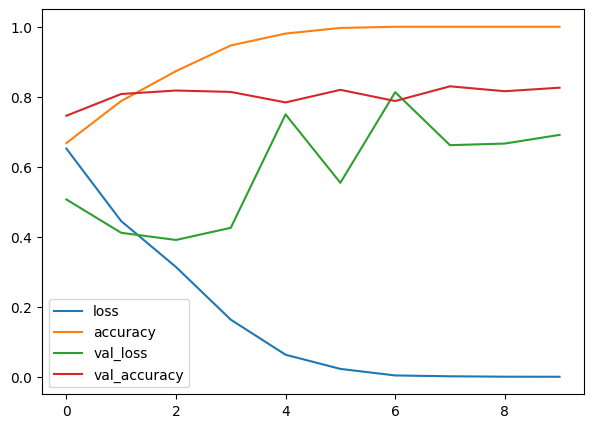

In [35]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(7,5))

In [36]:
# PLot the validation and trainig curves separately
def plot_loss_curves(history):
    """Returns separe loss curves for training and validation metrics."""
    loss=history.history["loss"]
    val_loss=history.history["val_loss"]


    accuracy=history.history["accuracy"]
    val_accuracy=history.history["val_accuracy"]

    epochs=range(len(history.history['loss'])) # How many epochs does you model run for

    # PLot the loss curve
    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot the accuracy
    plt.figure() # Every time we want a new plot we write this
    plt.plot(epochs,accuracy,label="accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

> **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means,it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be *diminised*

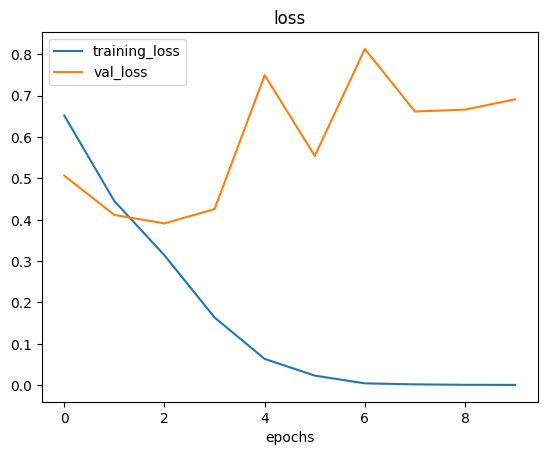

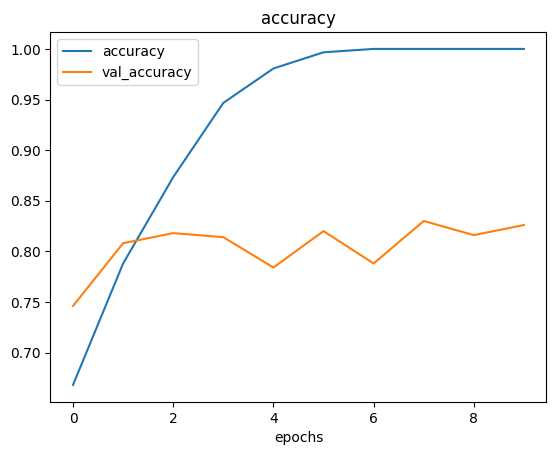

In [37]:
# Check out the loss abd accracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parmaters

Fitting a machine learning model comes in 3 steps:
1. Create the baseline model
2. Beat the baseline by overfitting a larger model
3. Reduce the overfitting

Ways to induce overfitting:
* Increase the number of COnv layers
* Increase the number of Conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add dataaugmentation
* Add regularization layers(such as MaxPool2D)
* Add more data..

> **NOTE:** Reducing overfitting is also known as **regularization**

In [38]:
#Create the model(this is going to be our new baseline)
model_5=Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           activation="relu",
           input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [39]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [40]:
# Fit the model
history_5=model_5.fit(train_data,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 4s 81ms/step - loss: 0.6358 - accuracy: 0.6200 - val_loss: 0.4783 - val_accuracy: 0.7980
Epoch 2/10
47/47 [==============================] - 3s 73ms/step - loss: 0.4643 - accuracy: 0.7947 - val_loss: 0.3837 - val_accuracy: 0.8580
Epoch 3/10
47/47 [==============================] - 3s 72ms/step - loss: 0.4210 - accuracy: 0.8187 - val_loss: 0.5599 - val_accuracy: 0.7280
Epoch 4/10
47/47 [==============================] - 3s 72ms/step - loss: 0.4144 - accuracy: 0.8160 - val_loss: 0.3526 - val_accuracy: 0.8660
Epoch 5/10
47/47 [==============================] - 3s 72ms/step - loss: 0.3767 - accuracy: 0.8447 - val_loss: 0.3612 - val_accuracy: 0.8540
Epoch 6/10
47/47 [==============================] - 3s 70ms/step - loss: 0.3194 - accuracy: 0.8727 - val_loss: 0.3198 - val_accuracy: 0.8680
Epoch 7/10
47/47 [==============================] - 4s 75ms/step - loss: 0.2837 - accuracy: 0.8927 - val_loss: 0.3267 - val_accuracy: 0.8700
Epoch 8/10
47

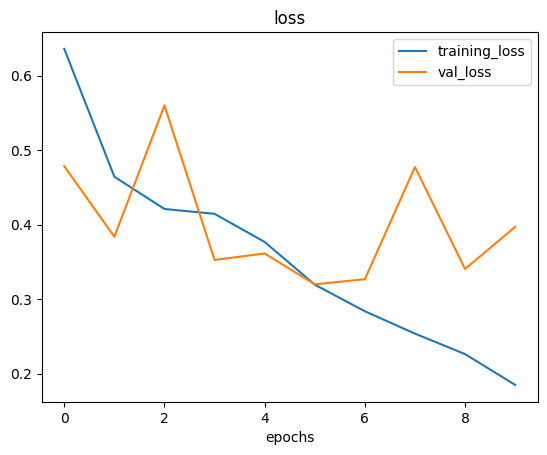

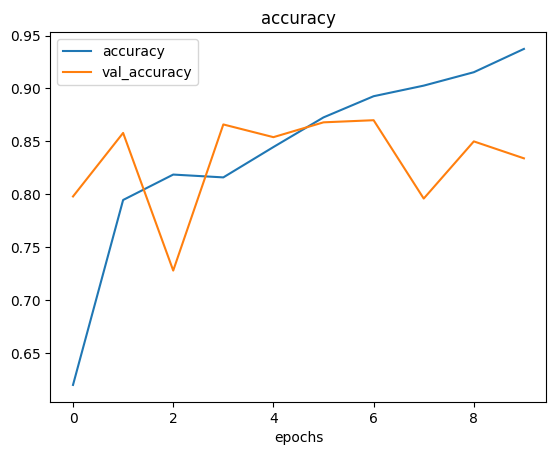

In [41]:
# Plot the loss curves using our separate loss function
plot_loss_curves(history_5)

In [42]:
# Get the summary of our model with max pooling
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [43]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [44]:
model_4_eval=pd.DataFrame(history_4.history)
model_5_eval=pd.DataFrame(history_5.history)
model_4_eval

,loss,accuracy,val_loss,val_accuracy
0,0.652157,0.668000,0.506905,0.746
1,0.445216,0.788000,0.411761,0.808
2,0.314098,0.873333,0.391297,0.818
3,0.163713,0.946667,0.425992,0.814
4,0.063564,0.980667,0.749866,0.784
5,0.023105,0.996667,0.554518,0.820
6,0.004422,1.000000,0.813273,0.788
7,0.002015,1.000000,0.661942,0.830
8,0.000884,1.000000,0.666550,0.816
9,0.000632,1.000000,0.691315,0.826


In [45]:
model_5_eval

,loss,accuracy,val_loss,val_accuracy
0,0.635777,0.620000,0.478339,0.798
1,0.464250,0.794667,0.383688,0.858
2,0.420974,0.818667,0.559921,0.728
3,0.414450,0.816000,0.352563,0.866
4,0.376686,0.844667,0.361239,0.854
5,0.319399,0.872667,0.319837,0.868
6,0.283691,0.892667,0.326721,0.870
7,0.253677,0.902667,0.477331,0.796
8,0.226206,0.915333,0.340392,0.850
9,0.184825,0.937333,0.396977,0.834


### Opening our bag of tricks and finding data augmentation

In [46]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2, #how much do you want to rotate an image?
                                           shear_range=0.2, # how much do you want to shear an image?
                                           zoom_range=0.2, # zoom in randomly on your image
                                           width_shift_range=0.2, # move your image  around on the x-axis
                                           height_shift_range=0.3,# move your image  around on the y-axis
                                           horizontal_flip=True) # do you want to flip the image

# Create ImageDataGeneratot without data augementation
train_datagen=ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)

> **Question:** What is data augmentation?

Data augmentation is the process of altering our training data,leading it to have more diversity ans in turn allowing our models to learn more genralizable(hopefully) patterns.Altering moght mean adjusting the rotation of an image,flipping it ,cropping it or something similar

Let's write code to visualize data augmentation

In [47]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented=train_datagen_augmented.flow_from_directory(directory=r"pizza_steak\train",
                                                                 target_size=(224,224),
                                                                 class_mode="binary",
                                                                 shuffle=False, # for demonstartion purpose only
                                                                 batch_size=32
                                                                 )

# Create non-augmented train data batches
print("Non augmented training data:")
train_data=train_datagen.flow_from_directory(directory=r"pizza_steak\train",
                                             class_mode="binary",
                                             batch_size=32,
                                             target_size=(224,224),
                                             shuffle=False)

# Create non-augemented test data batches
print("Non-augemented test data:")
test_data=test_datagen.flow_from_directory(directory=r"pizza_steak\test",
                                           target_size=(224,224),
                                           shuffle=False, # by default it's true
                                           class_mode="binary",
                                           batch_size=32 # by default the batch_size if 32
                                           )

Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented training data:
Found 1500 images belonging to 2 classes.
Non-augemented test data:
Found 500 images belonging to 2 classes.


> **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` bulit-in data augmentation paarameters our images are left as they are in the directories but are modified as they're loaded into the model

Finally let's visualize some augmented data!!!

In [48]:
# Get the sample data batches
images,labels=train_data.next()
augmented_images,augmented_labels=train_data_augmented.next() # Note: labels are'nt augmented... only the data(images)

showing image number:14


<Figure size 640x480 with 0 Axes>

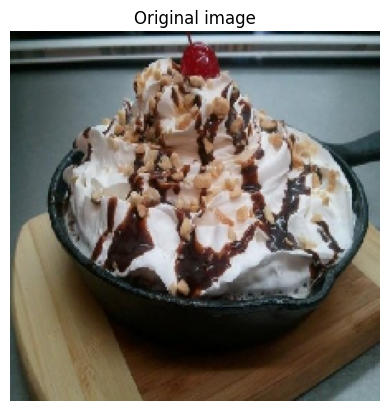

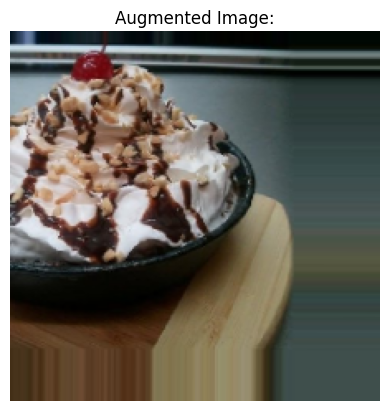

<Figure size 640x480 with 0 Axes>

In [49]:
# Show th eoriginal image and augmented image
import random
random_number=random.randint(0,31) # our batch size is 32..
print(f"showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image:")
plt.axis(False)
plt.figure()

Now we've seen what augmented training data looks like,let's build a model and see hwo it learns the patterns in the images

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model with data augmentation
model_6=Sequential([
    Conv2D(filters=10,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=10,kernel_size=(3,3),activation="relu"),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10,2,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile the model
model_6.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="binary_crossentropy",
                metrics=["accuracy"])

# Fit the model with augmented data
with(tf.device("/device:GPU:0")):
    history_6=model_6.fit(train_data_augmented, # fit the model on the augmented data
                          epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 271ms/step - loss: 0.7433 - accuracy: 0.5313 - val_loss: 0.6814 - val_accuracy: 0.5560
Epoch 2/5
47/47 [==============================] - 12s 262ms/step - loss: 0.6901 - accuracy: 0.5447 - val_loss: 0.6770 - val_accuracy: 0.7100
Epoch 3/5
47/47 [==============================] - 13s 273ms/step - loss: 0.6896 - accuracy: 0.5453 - val_loss: 0.6635 - val_accuracy: 0.7360
Epoch 4/5
47/47 [==============================] - 12s 264ms/step - loss: 0.6813 - accuracy: 0.5653 - val_loss: 0.6569 - val_accuracy: 0.5500
Epoch 5/5
47/47 [==============================] - 13s 269ms/step - loss: 0.7389 - accuracy: 0.5567 - val_loss: 0.6652 - val_accuracy: 0.6780


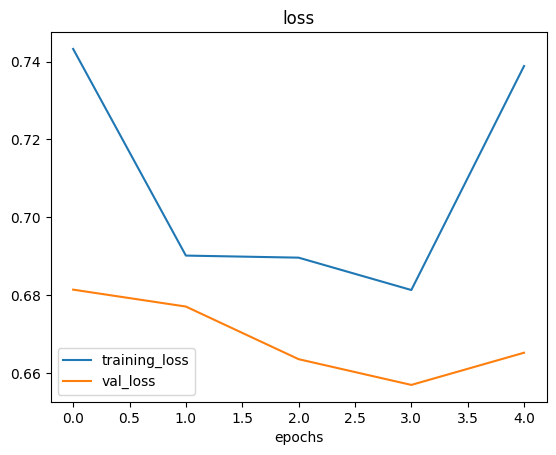

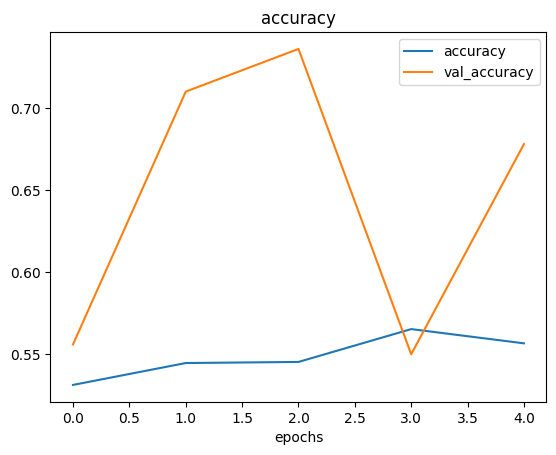

In [126]:
# Check your model's training curves
plot_loss_curves(history_6)

<Axes: title={'center': 'Model_6 Evaluation metrics'}>

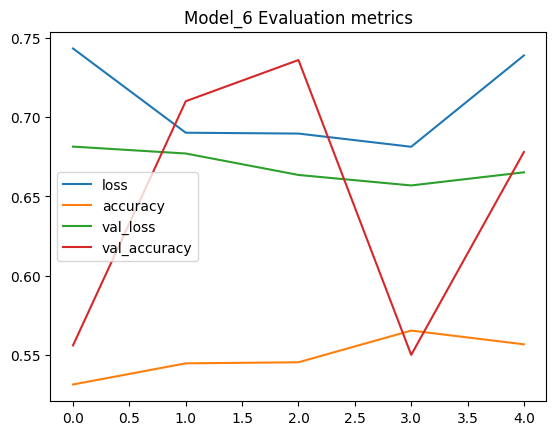

In [125]:
pd.DataFrame(history_6.history).plot(title="Model_6 Evaluation metrics")

Let's shuffle our augmented training data and train another model(the same as before) on it and see what happens

In [50]:
train_data_augmented_shuffle=train_datagen_augmented.flow_from_directory(directory=r"pizza_steak\train",
                                                                         target_size=(224,224),
                                                                         class_mode="binary",
                                                                         shuffle=True,
                                                                         batch_size=32)

Found 1500 images belonging to 2 classes.


In [55]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_7=Sequential([
    Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(223,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation="sigmoid")
])


# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
with(tf.device("/device:GPU:0")):
    history_7=model_7.fit(train_data_augmented_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 14s 291ms/step - loss: 0.6748 - accuracy: 0.5707 - val_loss: 0.6321 - val_accuracy: 0.6100
Epoch 2/5
47/47 [==============================] - 13s 281ms/step - loss: 0.6041 - accuracy: 0.6673 - val_loss: 0.4771 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 13s 276ms/step - loss: 0.5236 - accuracy: 0.7447 - val_loss: 0.3745 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 12s 247ms/step - loss: 0.5103 - accuracy: 0.7467 - val_loss: 0.3822 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 12s 253ms/step - loss: 0.4965 - accuracy: 0.7540 - val_loss: 0.3513 - val_accuracy: 0.8400


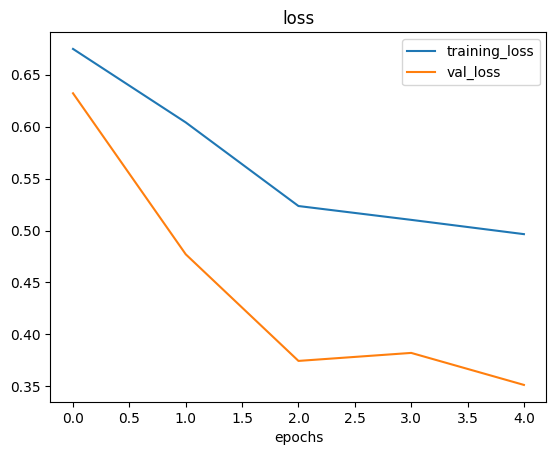

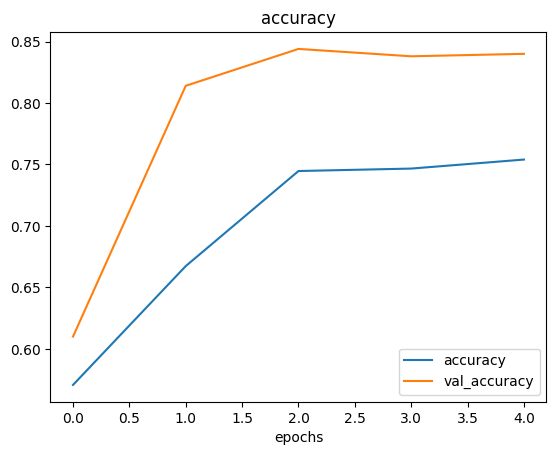

In [56]:
# Visualizing the model_7 metrics
plot_loss_curves(history_7)